# **MILESTONE 1 PHASE 1**

# **1. Introduction**

Nama : Teza Marlevi Fajar

Batch : 11

Problems :

Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.


**SELECT** limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, 
        pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, 
        bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 
        default_payment_next_month.

**FROM** bigquery-public-data.ml_datasets.credit_card_default

**LIMIT** 22033;

#### ABOUT DATASET

Dataset yang digunakan : h8dsft_P1M1_teza_marlevi_fajar.csv

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight  
* months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

---
# **2. Importing library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import ast

from sklearn.svm import SVC
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

---
# **3. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
data= pd.read_csv('h8dsft_P1M1_teza_marlevi_fajar.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


Kita akan menampilkan semu kolom.

In [3]:
pd.set_option('display.max.columns', None)

In [4]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [5]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Kita akan melakukan duplicate dataset.

In [6]:
data_new = data.copy()

Setelah selesai melakukan duplicate, kita akan cek dimensional dari dataset kita.

In [7]:
data.shape

(2965, 24)

Cek informasi dalam dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Kita akan mengubah nama kolom deafult payment

In [9]:
data.rename(columns={'default_payment_next_month':'def_payment'}, inplace=True)

Kita telah selesai melakukan rename.

## **Cleaning Dataset**

Dibagian ini kita akan melakukan Cleaning data terlebih dahulu, tujuan dari cleaning ini untuk membuat data siap pakai dalam melakukan Exploratory Data Analysis (EDA).

Untuk yang pertama kita akan mengganti value dari kolom `sex` yang seblumnya integer akan kita ubah menjadi string

In [10]:
data['sex'].replace({ 1: 'male', 2 : 'female'}, inplace=True)

Selanjutnya kita akan mengganti value dari kolom `marital_status` yang sebelumnya adalah integer akan kita ubah menjadi string

In [11]:
data['marital_status'].replace({ 0 :'unknown', 1: 'married', 2 : 'single', 3 : 'other'}, inplace=True)

Dalam `eduvation_level` terdapat value 0 yang dimana value ini tidak terdefinisikan, dalam kasus ini saya akan melakukan drop terhadap value 0 tersebut. Selain tidak terdefinisikan, value 0 tersebut hanya mempunyai dua data yang artinya jika kita melakukan drop terhadap data ini, hal tersebut tidak berdampak besar terhadap data kita.

In [12]:
# Check Value 0
data[data['education_level']==0]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_payment
1573,100000.0,male,0,single,37.0,0.0,0.0,-2.0,-2.0,-2,-2,7642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2099,250000.0,male,0,married,35.0,-2.0,-2.0,-2.0,-2.0,-2,-2,22839.0,7745.0,12035.0,33604.0,0.0,1190.0,7783.0,12046.0,33718.0,0.0,1190.0,590.0,0


In [13]:
# Drop row
data.drop([1573, 2099], axis=0, inplace=True)

Kita akan cek untuk memastikan value tersebut sudah didrop dengan benar

In [14]:
# Check Value 0 after dropping
data[data['education_level']==0]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_payment


Ternyata hasil menunjukan bahwa value 0 sudah berhasil kita drop.

---
# **4. Exploratory Data Analysis (EDA)**

Dibagian ini kita akan melakukan grouping, query dan visualisai serta mengambil kesimpulan atau insight yang kita dapat dari hasil visualisai kita.

## **Data Visualization**

### Limit Balance Terbanyak

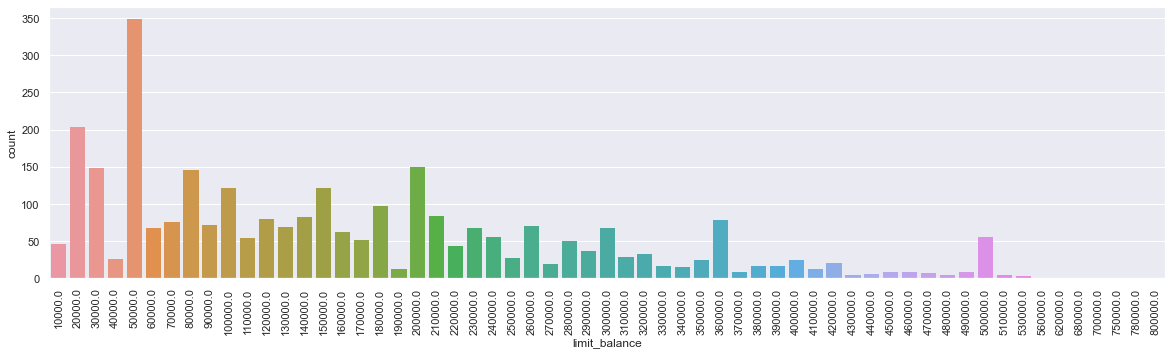

In [15]:
balance_plot = data['limit_balance'].sort_values(ascending=True).reset_index()
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=balance_plot, x='limit_balance', linewidth=0)
plt.xticks(rotation=90)
plt.show()

***Penjelasan*** :

Dari grafik diatas kita bisa melihat bahwa limit balance terbanyak di 50000.0 Dollar NT(Taiwan) dengan total 348 penduduk. Berdasarkan hasil total penduduk, kita akan mencari gender manakah yang paling banyak menggunakan limit balance sebesar 50000.0 Dollar NT(Taiwan).

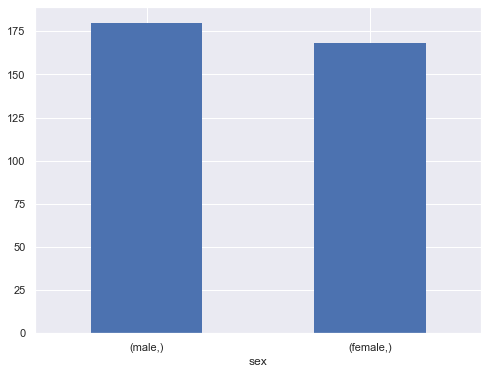

In [16]:
sns.set(rc={'figure.figsize':(8,6)})
balance_plot1 = data[data['limit_balance'] == 50000.0][['sex']].value_counts().plot(kind='bar', linewidth=0)
plt.xticks(rotation=0)
plt.show()

***Penjelasan***:

Berdasarkan grafik di atas kita bisa mengetahui bahwa yang mempunyai limit balance sebesar 50000.0 Dollar NT adalah gender pria dengan total 180 orang,sedangkan perempuan dengan total 168 orang.

### Perbandingan Limit Balance Berdasarkan Gender dan Education level

<AxesSubplot:xlabel='education_level', ylabel='limit_balance'>

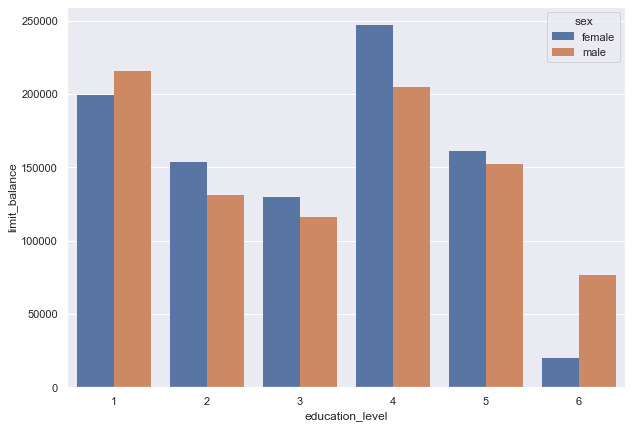

In [17]:
gender_plot = data.groupby(['education_level','sex'])[['limit_balance']].mean().reset_index()
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(data=gender_plot, x='education_level', y='limit_balance', hue='sex', ci =0, linewidth=0)

***Penjelasan***:

Berdasarkan grafik diatas kita bisa melihat bahwa rata-rata yang mempunyai `limit_balance` tertinggi berada di `education_level` 4 dan bergender perempuan dengan hasil rata-rata 247142.857143 dan dari gender laki-laki yang mempunyai limit balance tertinggi berada di `education_level`1 dengan hasil rata-rata 215857.843137 , berdasarkan hasil diatas kita akan melanjutkan mencari insight bagaimana pengeluaran perempuan di `education_level` 4 yang mempunyai limit balance tertinggi?

 Sebelum mengetahui lebih lanjut kita harus ingat kembali bahwa `education_level` 4 definisi dari other, yang artinya mereka yang berada di kelompok tersebut mempunyai pendidikan yang berbeda, berbeda yang saya maksud adalah kemungkinan mereka melakukan pendidikan lewat kursus, bootcamp dll.

In [18]:
data.query("education_level == 4 &\
            sex == 'female' &\
            limit_balance == 300000.0")

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,def_payment
1202,300000.0,female,4,single,32.0,0.0,0.0,0.0,0.0,0,-1,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
2082,300000.0,female,4,married,31.0,-2.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


***Penjelasan***:

Dari hasil yang kita dapat perempuan di `education_level` 4 mempunyai umur 31 dan 32 tahun dengan status single untuk umur 32 tahun dan married untuk umur 31 tahun, saya berasumsi bahwa  perempuan dengan status single mempunyai keperluan sendiri seperti fashion lifestyle dan pendidikan, sedangkan yang berstatus married jarang menggunakan kartu kredit, dengan asumsi biaya perempuan tersebut sudah ditanggung oleh pasangannya.

### Perbandingan dari Deafult Payment

c:\Users\M A R L E V I\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


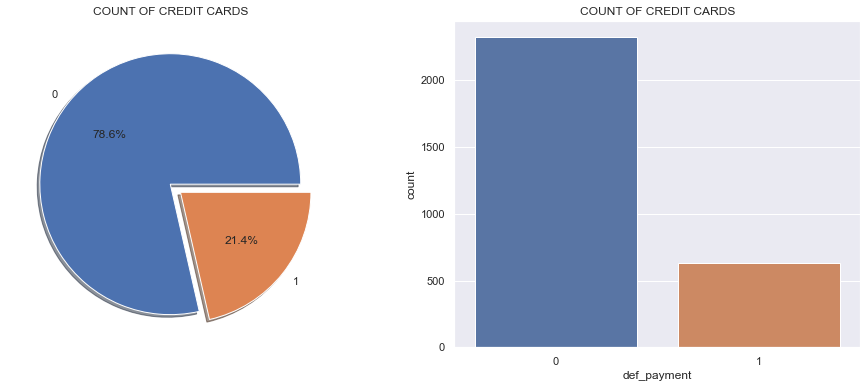

In [19]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data['def_payment'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('COUNT OF CREDIT CARDS')
ax[0].set_title('COUNT OF CREDIT CARDS')
ax[0].set_ylabel('')
sns.countplot('def_payment',data=data,ax=ax[1])
ax[1].set_title('COUNT OF CREDIT CARDS')
plt.show()

***Penjelasan***:

Dari grafik diatas kita bisa melihat bahwa banyak penduduk taiwan yang tidak akan melakukan pembayaran untuk bulan selanjutnya, berbanding jauh dengan penduduk taiwan yang akan melakukan pembayaran di bulan selanjutnya.

*Note*:
* Data pada kolom deafult payment, termasuk data yang unbalanced karena kolom tersebut mengandung 78.6% untuk value 0 dan 21.4% untuk value 1. Dengan data unbalanced ini akan memengaruhi dalam pembuatan model kita.

### Perbandingan Deafult Payment Berdasarkan Gender

Menyambung dengan analysis sebelumnya, sekarang kita akan mencari tahu berapa banyak orang yang tidak melakukan pembayaran berdasarkan gender.

<AxesSubplot:xlabel='def_payment', ylabel='count'>

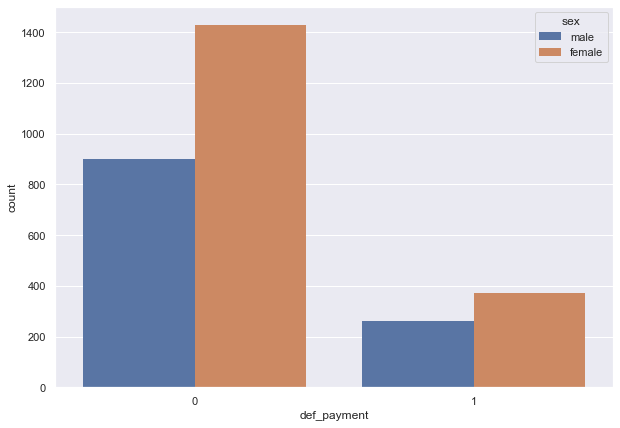

In [20]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data=data, x='def_payment', hue='sex', linewidth=0)

***Penjelasan***:

Seperti yang kita lihat bahwa gender perempuan mendominasi dalam kategori 0 dan 1, dengan total 1429 perempuan untuk value 0 dan total 373 perempuan untuk value 1. Kita akan mencari tahu mengapa perempuan bisa lebih mendominasi dibanding pria.

<AxesSubplot:xlabel='sex', ylabel='count'>

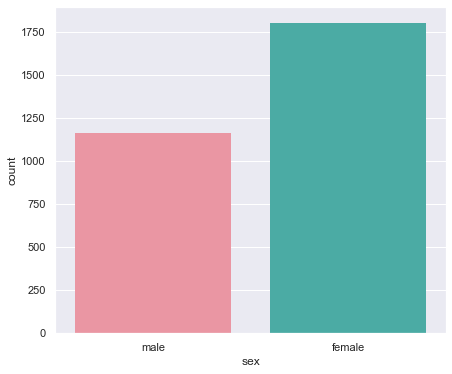

In [21]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set_palette("Set3", 1)
sns.countplot(data=data, x='sex', linewidth=0)

***Penjelasan***: 

Hal yang sangat mudah dijelaskan dari pertanyaan kita sebelumnya adalah melalui grafik perbandingan diatas, Berdasarkan grafik tersebut kita mengetahui bahwa perempuan lebih banyak dari pria, dengan total 1802 perempuan dan 1161 pria. Dalam kasus ini perbandingan grafik diatas menurut saya sudah cukup menjawab pertanyaan kita sebelumnya yaitu, mengapa perempuan mendominasi di deafult payment? karena perempuan tersebut lebih banyak dibanding pria di kasus ini, dan saya juga tidak dapat menarik data lebih lanjut untuk membuktikan mengapa perempuan lebih mendominasi karena terbatasnya data dalam dataset ini.

### Perbandingan Deafult Payment berdasarkan Education Level dan Gender

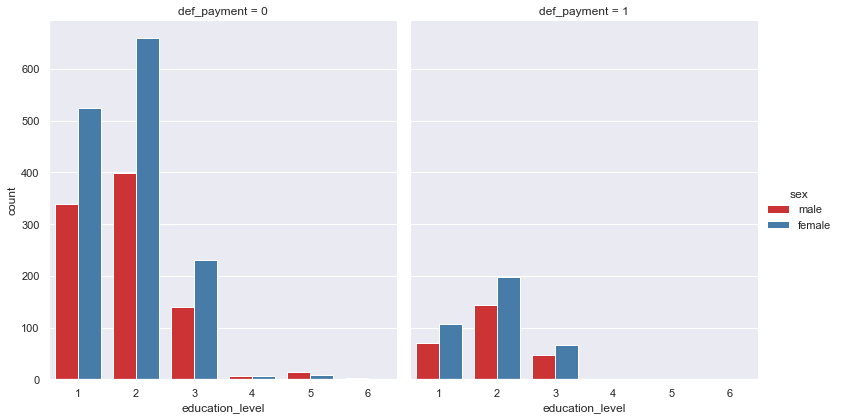

In [22]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set_palette("Set1")
sns.catplot(data=data, x='education_level', hue='sex', col='def_payment',
            kind='count', height=6, aspect=.9)

***Penjelasan***:



Berdasarkan grafik diatas kita bisa mengetahui bahwa perempuan di `education_level` 2 merupakan yang paling tertinggi dari kedua deafult payment, yang dimana perempuan yang mendominasi.

### Korelasi

<AxesSubplot:>

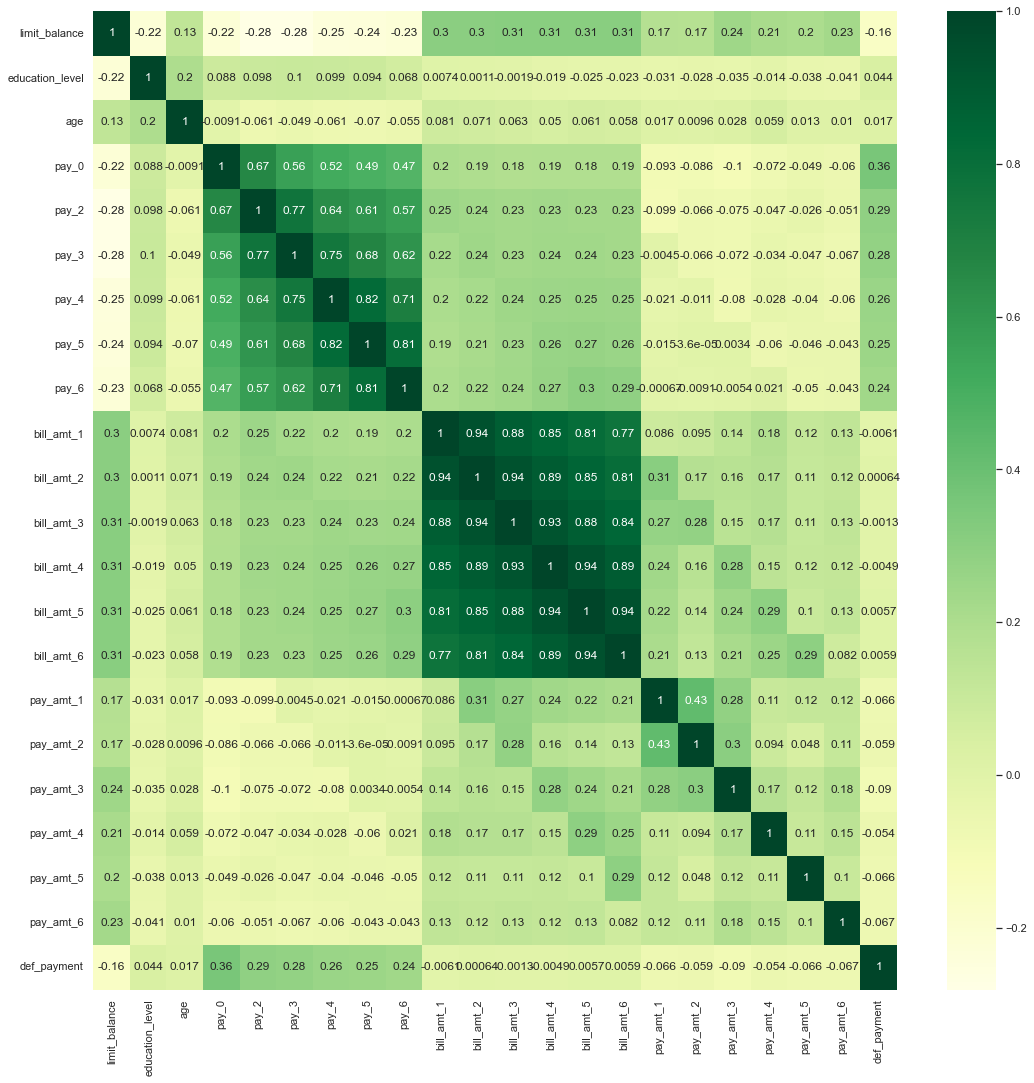

In [23]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(data=data.corr(), annot=True, cmap='YlGn')

***Penjelasan***:

Berdasarkan grafik diatas kita bisa melihat bahwa hampir semua kolom mempunyai korelasi yang kecil terhadap target yaitu kolom def_payment. Hanya pay_0 sampai dengan pay_6 yang mempunyai korelasi tinggi terhadap kolom def_payment, dari hasil ini kita bisa menggunakan sebagai pertimbangan dalam pengambilan kolom feature.

---
# **5. Data Preprocessing**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

Kita akan memilih kolom untuk dijadikan feature dan target terhdap model 

Target :
* def_payment

Feature :
* Pay_0 sampai Pay_6
* Education Level
* pay_amt_ 1 sampai pay_amt_6

Alasan saya mengambil kolom tersebut menjadi feature karena beberapa kolom tersebut dapat berkaitan dengan target dari model kita yaitu def_payment dan saya sudah melakukan peritmbangan dari hasil EDA.

In [24]:
data_for_model = data[['education_level','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','def_payment',
                       'pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']]
data_for_model.head()

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,def_payment,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,0.0,0.0,0.0,0.0,0,0,0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,1,0.0,0.0,0.0,0.0,0,0,0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,1,0.0,0.0,0.0,2.0,0,0,0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,1,0.0,0.0,0.0,0.0,0,0,0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,1,0.0,0.0,0.0,0.0,0,0,0,1367.0,1606.0,692.0,709.0,721.0,692.0


## Get Data Inference

In [25]:
data_inference = data_for_model.sample(10, random_state=10)
data_inference

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,def_payment,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
742,2,0.0,0.0,0.0,0.0,0,0,1,2000.0,1340.0,1298.0,827.0,676.0,707.0
1257,1,0.0,0.0,0.0,0.0,0,0,0,3100.0,7172.0,10000.0,1662.0,3000.0,1350.0
948,1,2.0,0.0,0.0,0.0,0,-1,0,4000.0,3258.0,1000.0,0.0,77500.0,0.0
1606,2,0.0,0.0,0.0,-2.0,-2,-2,0,1017.0,0.0,0.0,0.0,1047.0,56970.0
593,1,0.0,0.0,0.0,0.0,0,0,0,5087.0,2891.0,3755.0,2941.0,3206.0,2837.0
1093,3,0.0,0.0,2.0,0.0,0,0,0,3887.0,0.0,453.0,312.0,1500.0,500.0
2574,2,-2.0,-1.0,0.0,0.0,-1,0,0,6640.0,1025.0,10249.0,5380.0,5000.0,2261.0
2410,1,-1.0,-1.0,-1.0,-1.0,0,-1,0,14128.0,24902.0,21479.0,11465.0,11356.0,66710.0
1416,2,2.0,0.0,0.0,2.0,2,2,1,1500.0,2000.0,0.0,1000.0,0.0,1000.0
1012,4,0.0,0.0,0.0,0.0,0,0,0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0


Selanjutnya kita akan membuat variable untuk data Train dan data Test

In [26]:
data_train_test = data_for_model.drop(data_inference.index)
data_train_test.head()

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,def_payment,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,0.0,0.0,0.0,0.0,0,0,0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,1,0.0,0.0,0.0,0.0,0,0,0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,1,0.0,0.0,0.0,2.0,0,0,0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,1,0.0,0.0,0.0,0.0,0,0,0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,1,0.0,0.0,0.0,0.0,0,0,0,1367.0,1606.0,692.0,709.0,721.0,692.0


Kita telah berhasil membuat variable baru untuk data Train dan Test, selanjutnya kit akan melakukan reset index

In [27]:
data_train_test.reset_index(drop=True, inplace=True)
data_inference.reset_index(drop=True, inplace=True)

Selanjutnya kita akan melakukan splitting dataset.


## Splitting Dataset

Kita akan membagi dataset antara fitur dan target, karena tujuan saya adalah membuat klasifikasi model untuk deafult payment, maka kolom tesebut akan saya gunakan sebagai target.

In [28]:
#Splitting dataset 

X = data_train_test.drop('def_payment', axis=1)
y = data_train_test['def_payment']

In [29]:
X.head()

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,1,0.0,0.0,0.0,0.0,0,0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,1,0.0,0.0,0.0,0.0,0,0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,1,0.0,0.0,0.0,2.0,0,0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,1,0.0,0.0,0.0,0.0,0,0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,1,0.0,0.0,0.0,0.0,0,0,1367.0,1606.0,692.0,709.0,721.0,692.0


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: def_payment, dtype: int64

Kita sudah melakukan split anatara feature dan target selanjutnya kita akan melihat dimensional data kita untuk menentukan test size darii spliting antara train set dan test set

In [31]:
data_for_model.shape

(2963, 14)

Kita memiliki 2963 data (baris) di dataset saya, sehingga kita dapat menentukan berapa banyak data yang akan digunakan sebagai data test. Saya akan menggunakan 20% data dari kumpulan data untuk pengujian data.

In [32]:
# Splitting between Train set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Display dimensional
print('X_train Shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('\nX_test Shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train Shape: (2362, 13)
y_train shape: (2362,)

X_test Shape: (591, 13)
y_test shape: (591,)


Kita Telah sukses dalam melakukan split antara Train set dan Test set.

## Handling Outliers

### Outliers


Outlier adalah sebuah data yang menyimpang atau diluar dari standard deviation, kita harus melakukan handling terhadap outlier karena hal ini dapat memengaruhi terhadap model yang akan kita buat. Kita akan handling outlier di bagian Train-set saja, sebelumnya kita akan melakukan deteksi outlier.

### Outliers Detection

Kita akan mendeteksi outlier menggunakan boxplot maka dari itu kita akan membuat variabel baru untuk drop kolom type object, tetapi dalam kasus ini semua feature saya merupakan Numerical, artinya saya tidak perlu memisahkan kolom.

In [33]:
def diag_outlier_plots(data):
    for col in data :
        plt.figure(figsize=(16,5))

        #Histogram
        plt.subplot(1,2,1)
        sns.histplot(data[col], bins=30, linewidth=0.5)
        plt.title('Histogram')

        #boxplot
        plt.subplot(1,2,2)
        sns.boxplot(y=data[col], linewidth=0.5)
        plt.title('Boxplot')
        plt.show()

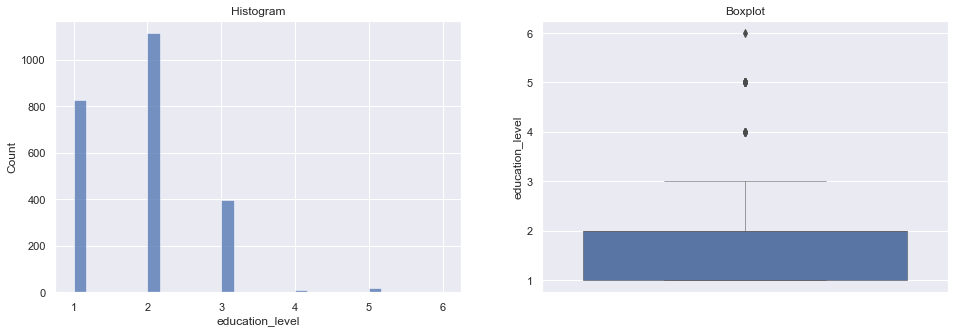

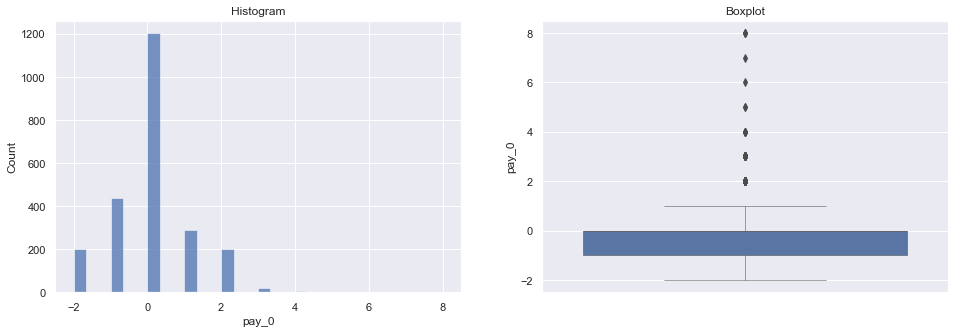

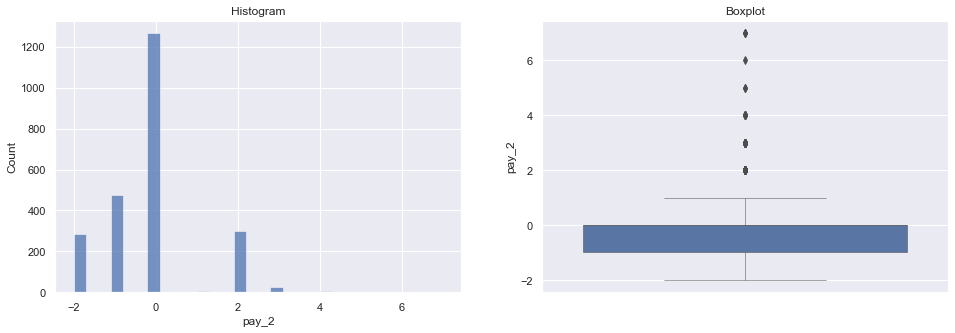

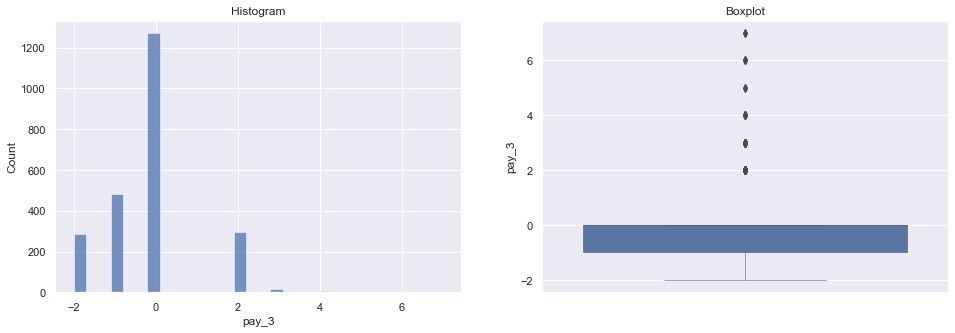

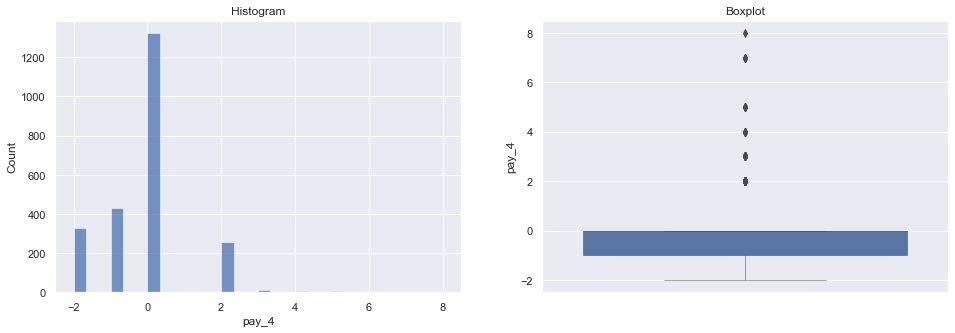

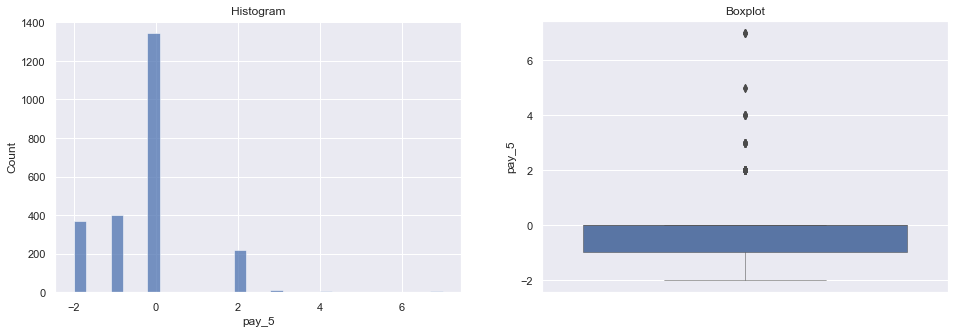

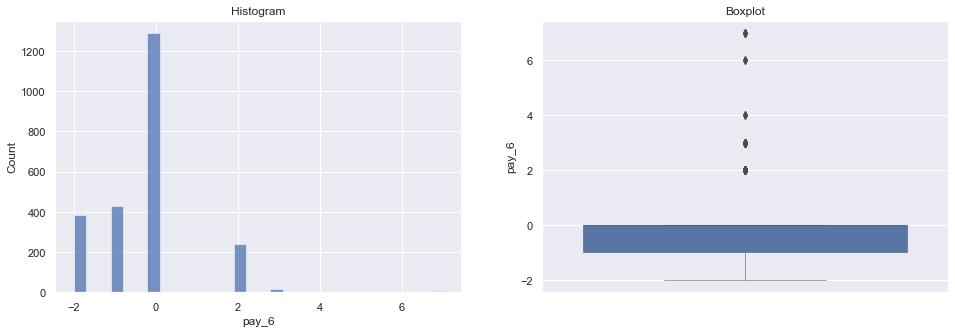

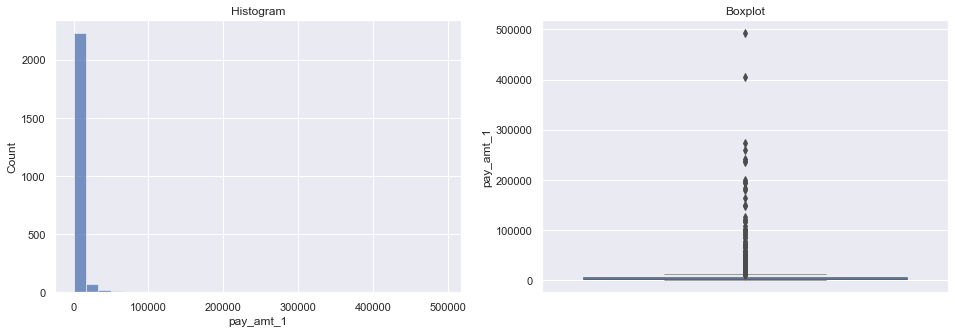

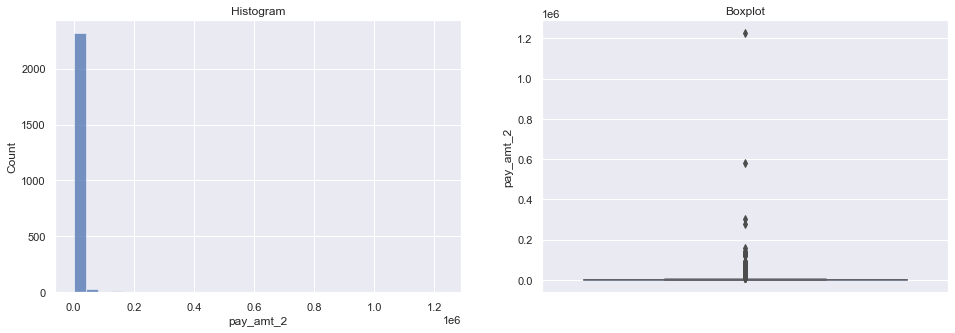

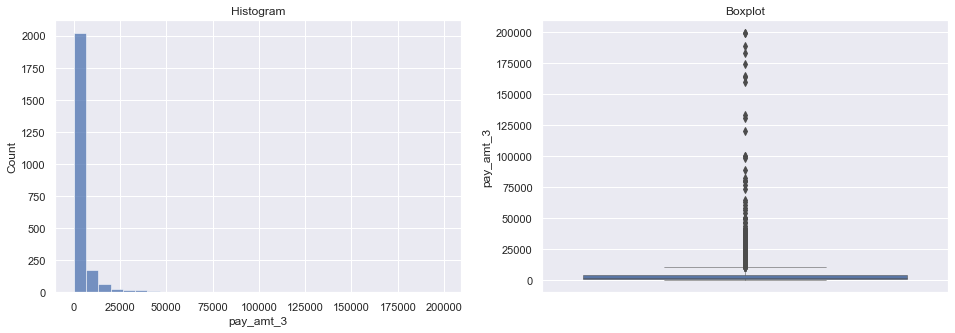

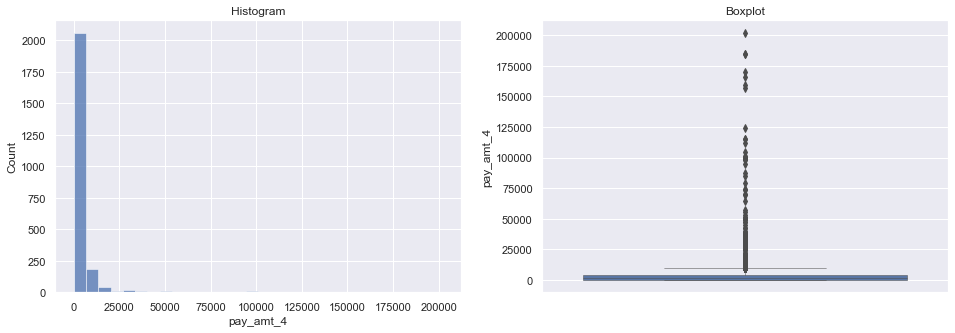

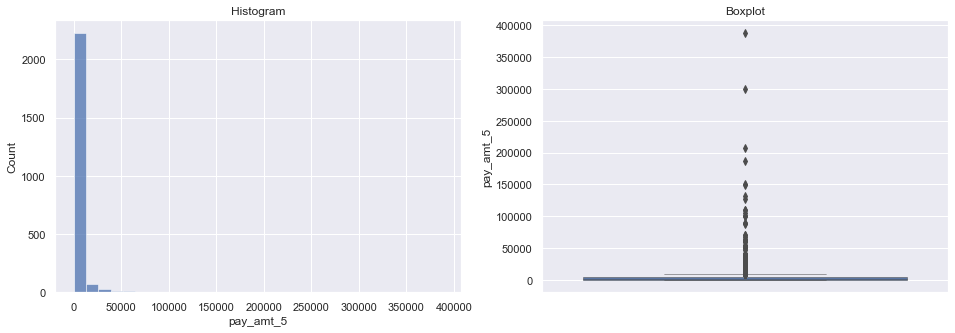

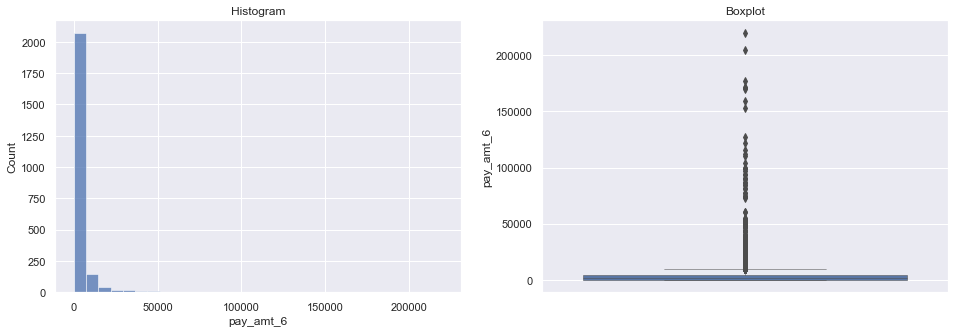

In [34]:
# Checking Outliers
diag_outlier_plots(X_train)

Dari hasil yang kita dapat, kita bisa melihat bahwa semua feature kita mengandung outliers, disini saya akan menggunakan teknik censoring untuk melakukan handling terhdap outliers tersebut. Kenapa saya menggunakan teknik censoring? karena tujuan dari censoring adalah mendistorsi distribusi variabel hubungan antar variable, dan juga censoring tidak menghapus data dari outliers tersebut, jadi kita tidak kehilangan banyak data. Saya akan melakukan handling terhadap outliers dari kolom pay_0 sampai kolom pay_6, karena saya ingin melakukan distorsi terhadap data tersebut agar data tersebut menggunakan 95% percentile dari isi datanya, agar menghasilkan representasi yang mirip. Saya tidak melakukan handling terhadap kolom pay_amt_1 sampai pay_amt_6 karena jumlah pembayaran tersebut merupakan pembayaran yang wajar.

In [35]:
# Melakukan Censoring atau Capping
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, 
                        variables=['education_level','pay_0','pay_2',
                        'pay_3','pay_4','pay_5','pay_6'])

winsoriser.fit(X_train)
X_train_cap = winsoriser.transform(X_train)

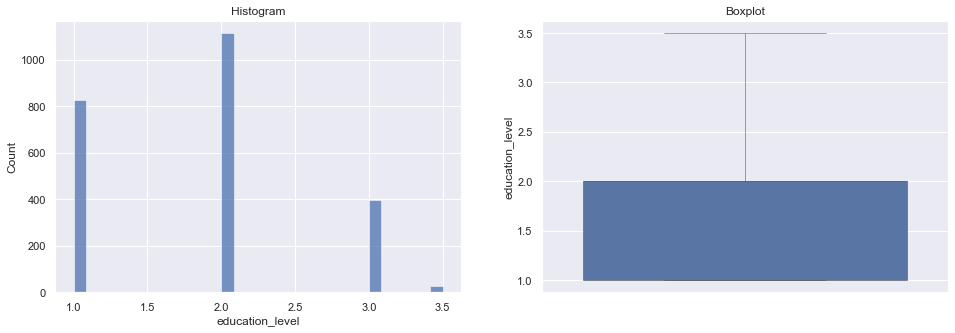

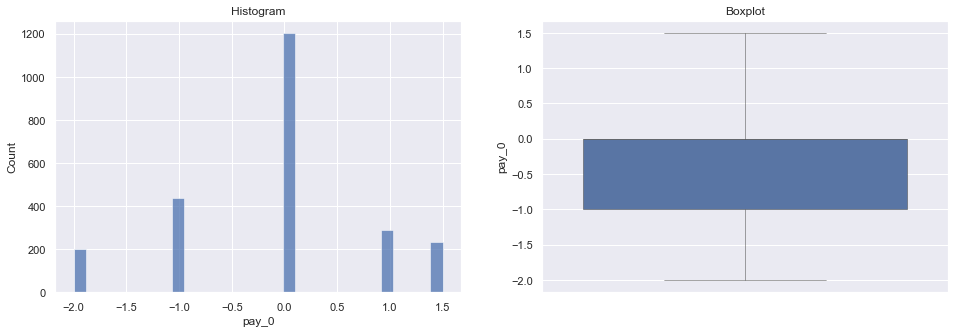

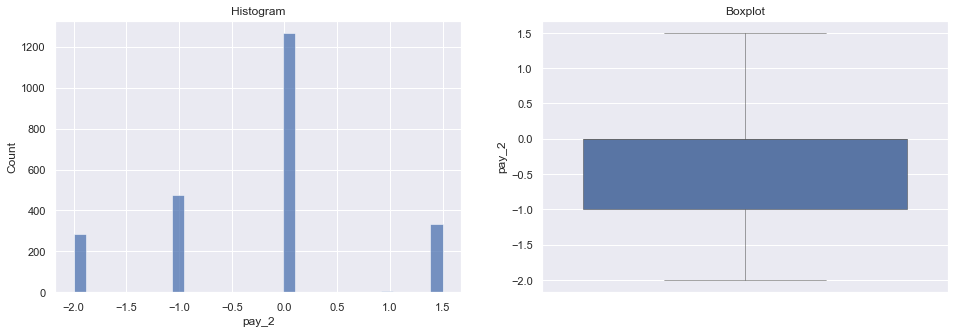

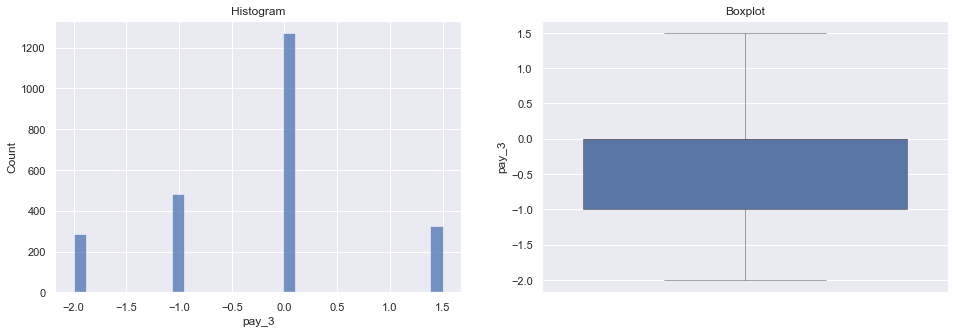

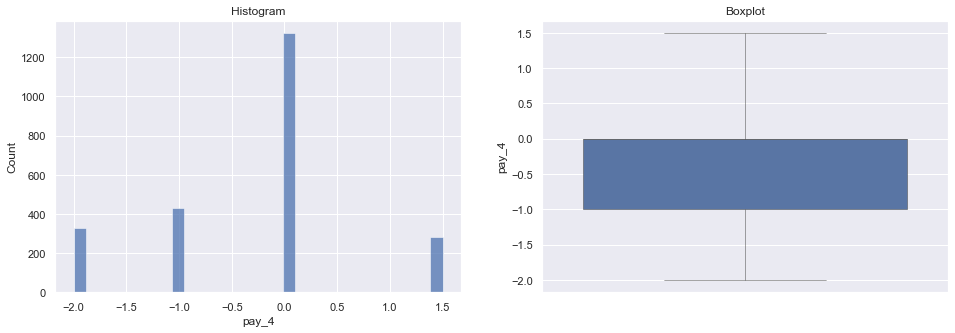

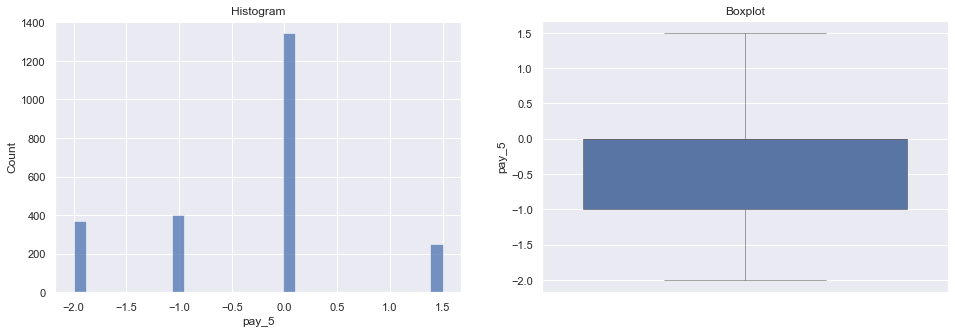

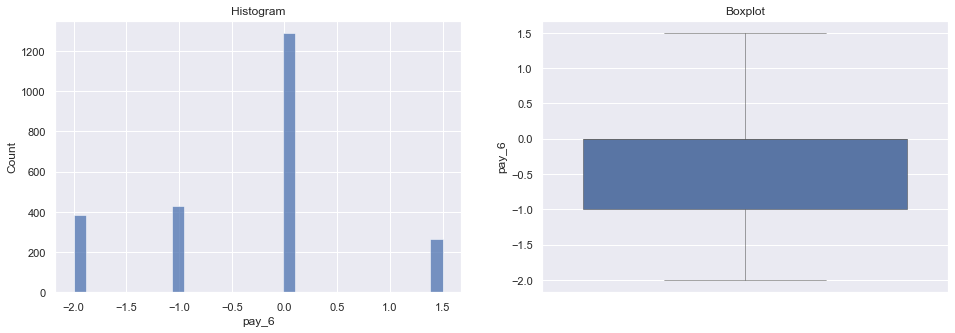

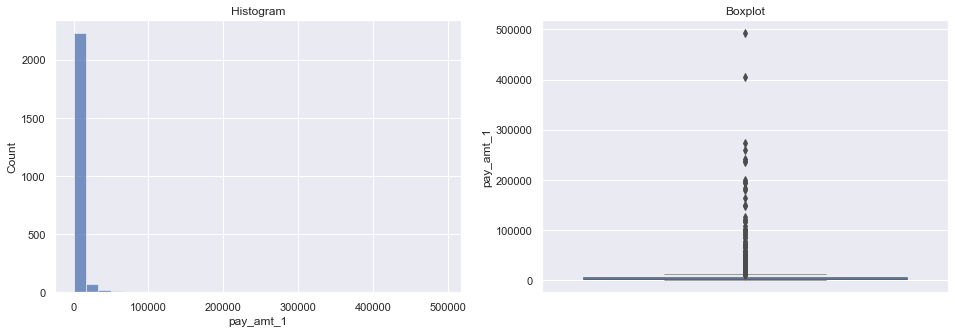

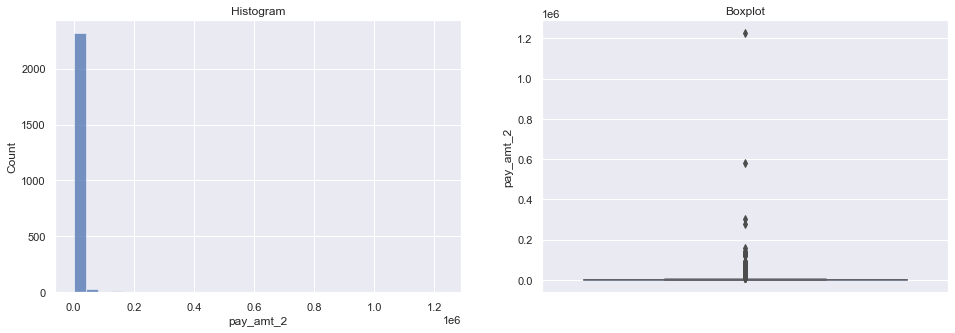

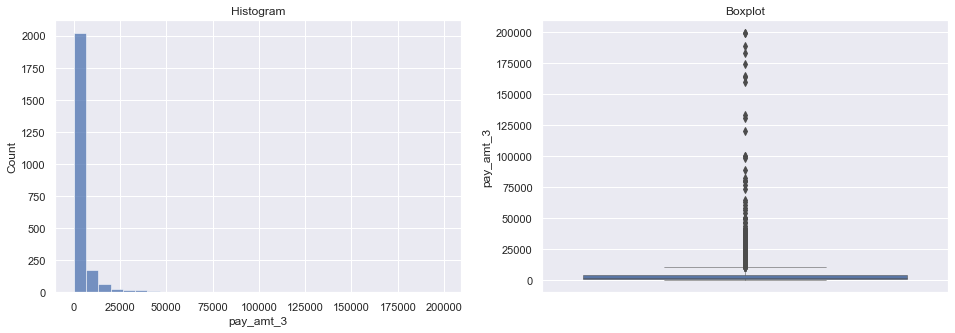

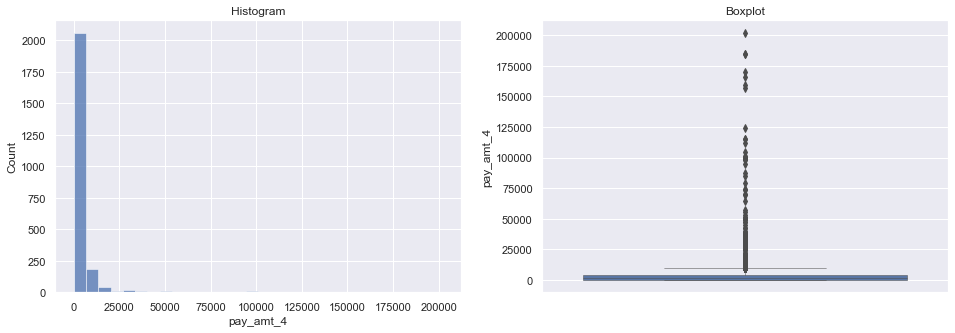

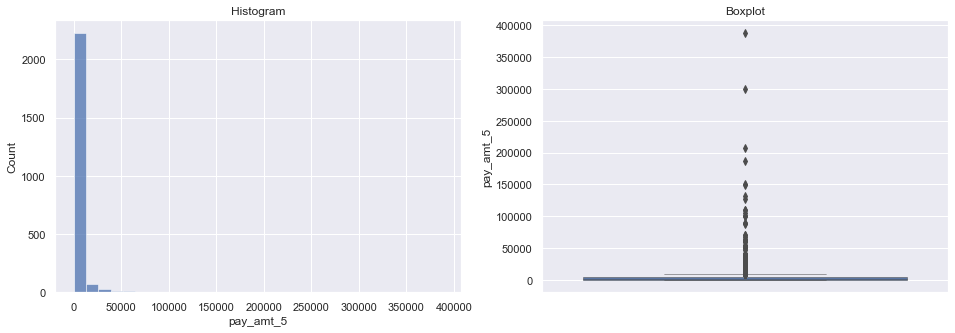

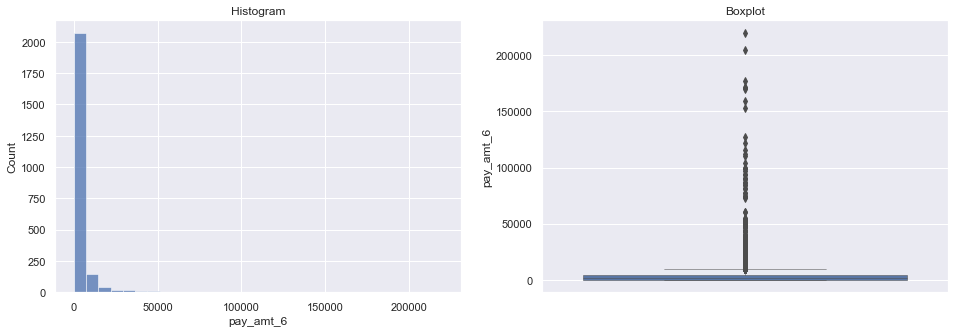

In [36]:
diag_outlier_plots(X_train_cap)

Kita telah berhasil melakukan handling outliers.

## Handling Missing Values

### Missing Values

Hilangnya sebuah data yang ada ditataset atau biasa disebut sebagai `Missing Value` ini sangat memengaruhi model yang akan kita buat. Sama seperti sebelumnya yaitu outliers, missing value juga harus kita tangani dengan baik dan tepat.

In [37]:
def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['col_name','missing_count','missing_percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], 
                                df.iloc[:,i].isnull().sum(), 
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100]
    print('Generate df_missval')
    return df_missval

In [38]:
detect_missval(X_train_cap)

Generate df_missval


,col_name,missing_count,missing_percentage


In [39]:
detect_missval(X_test)

Generate df_missval


,col_name,missing_count,missing_percentage


In [40]:
y_train.isnull().sum()

0

In [41]:
y_test.isnull().sum()

0

Seperti yang kita lihat, tidak ada missing value yang artinya kita tidak perlu melakukan handling.

## Feature Selection

Kita akan melihat korelasi dan melakukan seleksi terhadap feature yang ada di data kita. Disini kita akan menggunakan data dengan dataframe yang sudah dibuat sebelumnya yaitu `X_train_cap` dan `y_train` untuk melihat korelasi antar feature dan korelasi feature dengan target. Beberapa yang harus kita perhatikan dalam melihat korelasi antara feature dan target.

1. Korelasi mempunyai range nilai dari -1 sampai 1 yang dimana jika nilai mendekati 0 artinya feature terssebut tidak berkolersi satu sama lain, begitupun dengan nilai yang mendekati angka 1 berarti feature tersebut saling berkorelasi.

2. Melihat korelasi menggunakan heatmap hanya bisa untuk kolom yang bersifat numerical bukan categirocal

3. Target dan feature boleh berkorelasi, untuk meyakinkan bahwa feature tersebut cocok dengan target yang akan kita jadikan prediksi.

4. Feature tidak boleh berkorelasi dengan feature yang lain.

In [42]:
data_heat = pd.concat([X_train_cap, y_train], axis=1)

<AxesSubplot:>

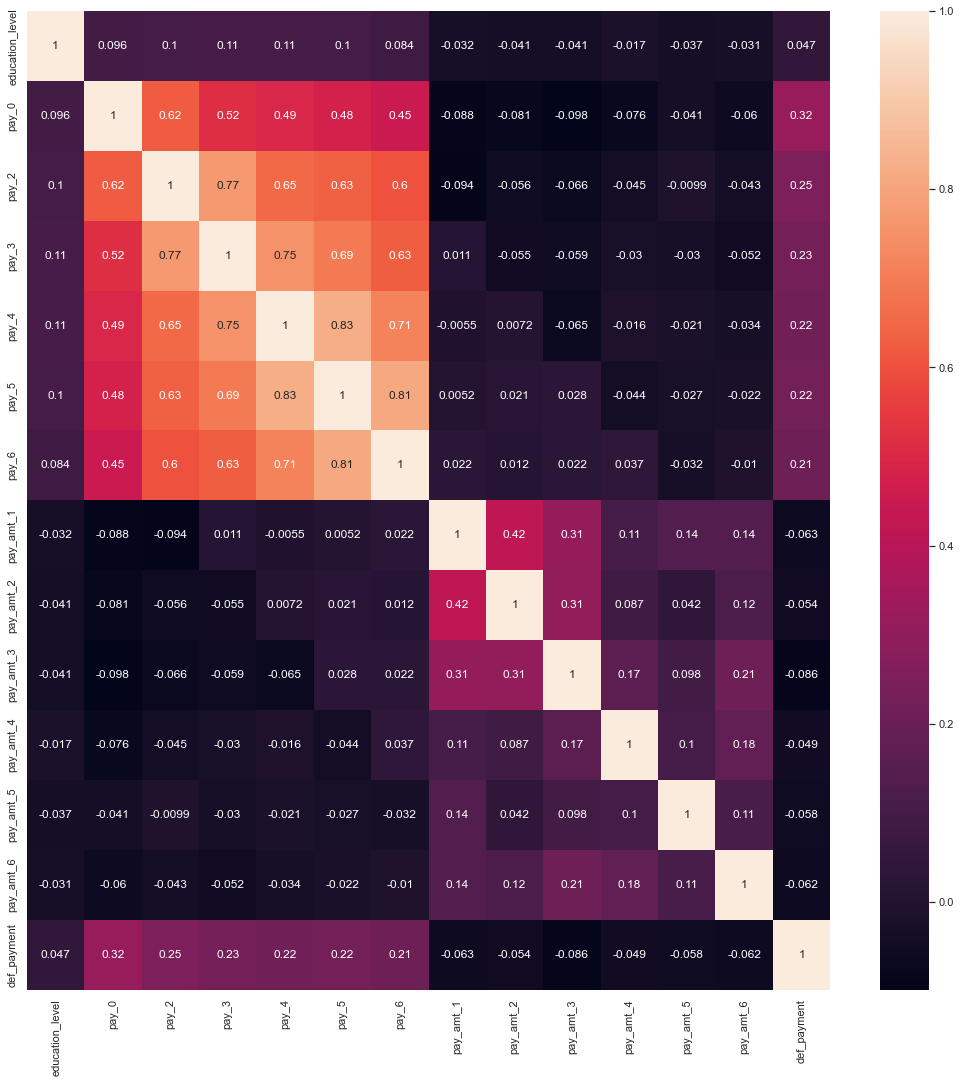

In [43]:
sns.heatmap(data=data_heat.corr(), annot=True)

Seperti yang kita lihat, kolom pay 0 sampai pay 6, mempunyai korelasi yang tinggi sesama antar kolom maka dari itu saya akan melakukan drop terhadap, dari pay4 sampai pay 6. Saya tidak melakukan drop terhadap kolom pay_0, pay_2 dan pay_3, karena menurut saya kolom tersebut akan mewakilkan dari kolom yang akan kita lakukan drop.

Dropping kolom yang sudah ditentukan

In [44]:
X_train = X_train_cap.drop(columns=['pay_4','pay_5','pay_6'], axis=1 )

In [45]:
X_test = X_test.drop(columns=['pay_4','pay_5','pay_6'], axis=1 )

## Split Between Numerical columns and Categorical columns

In [46]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


In [47]:
# Split Train-set and Test-set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

Seperti yang kita lihat, dalam feature kita tidak mempunyai categorical columns yang artinya kita tidak akan melakukan encoding

## Feature Scaling

Pada bagian ini kita akan melakukan scaling, yang dimana hanya dilakukan terhadap kolom yang bertipe numerik dan ada beberapa hal yang harus diperhatikan sebelum melakukan Scaling, yaitu jika distribusi nya normal kita akan menggunakan metode Standard Scaler dan jika berbentuk skewed kita akan menggunakan MinMaxScaler. Untuk mengetahui kolom tersebut skewed atau tidak kita bisa melihat distribution pada bagian handling outliers, tapi untuk kali ini kita akan melihat nilai skewness dari nilai skewness.

In [48]:
def check_dist(data) :
    dist = data.skew(numeric_only=True)
    normal_dist = []
    skew_dist = []

    for i in range(len(dist)):
        if dist.values[i] < -0.5:
            skew_dist.append(dist.index[i])
        elif dist.values[i] > 0.5:
            skew_dist.append(dist.index[i])
        else:
            normal_dist.append(dist.index[i])

    print('skew_dist :', skew_dist)
    print("=========="*15)
    # normal_dist
    print('normal_dist :',normal_dist)

In [49]:
check_dist(X_train_num)

skew_dist : ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
normal_dist : ['education_level', 'pay_0', 'pay_2', 'pay_3']


Seperti yang kita lihat bahwa dari X_train_num mempunyai kolom yang berdisribusi normal dan skewed, Selanjutnya kita akan memisahakn antara Normal distribution dan Skewed Distribution.

In [50]:
# Distribusi Normal
X_train_num_normal = X_train_num.drop(['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], axis=1)
X_test_num_normal = X_test_num.drop(['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], axis=1)

In [51]:
# Distribusi Skewed
X_train_num_skewed = X_train_num.drop(['education_level', 'pay_0', 'pay_2', 'pay_3'], axis=1)
X_test_num_skewed = X_test_num.drop(['education_level', 'pay_0', 'pay_2', 'pay_3'], axis=1)

Kita akan melakukan scaling sesuai dengan scalernya masing masing.

In [52]:
# Menggunakan Standard scaler
scaler_std = StandardScaler()
scaler_std.fit(X_train_num_normal)
X_train_num_normal_scaled = scaler_std.transform(X_train_num_normal)
X_test_num_normal_scaled = scaler_std.transform(X_test_num_normal)

X_train_num_normal_scaled.shape

(2362, 4)

Sekarang kita handle kolom dengan distribusi normal menggunakan MinMaxScaler

In [53]:
# Menggunakan MinMaxScaler
scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train_num_skewed)
X_train_num_skewed_scaled = scaler_mm.transform(X_train_num_skewed)
X_test_num_skewed_scaled = scaler_mm.transform(X_test_num_skewed)

X_train_num_skewed_scaled.shape

(2362, 6)

Kita sudah melakukan scaling dimasing-masing numerical. selanjutnya kita akan menggabungkan kolom numerik yang normal dan kolom numerik yang skewed

In [54]:
# Menggabungkan Kolom
X_train_final = np.concatenate([X_train_num_normal_scaled, X_train_num_skewed_scaled], axis=1)
X_test_final = np.concatenate([X_test_num_normal_scaled, X_test_num_skewed_scaled], axis=1)

In [55]:
# Cek Dimensional
print(X_train_final.shape)
print(X_test_final.shape)

(2362, 10)
(591, 10)


Kita telah berhasil menggabungkan kolom numeric normal distribution dan numeric skewed.

---
# **6. Model Definition**

***Objective*** :

Saya ingin membuat model prediksi klasifikasi yang dimana bisa menentukan orang tersebut termasuk yang akan bayar di bulan selanjutnya atau tidak.

***Algorithm***

* Logistic Regression
* SVM
* Decisison Tree
* Random Forest
* K-Nearest Neighbor
* Naive Bayes
* Other Algorithm (Extra Tree Classifier)



Kita akan memilih algoritma yang terbaik, berdasarkan hasil dari cross validation

***Model Evaluation***

* Classification Report

## Logistic Regression

In [56]:
model_log_reg = LogisticRegression(random_state=10)

##  SVM

In [57]:
model_svm = SVC(random_state=10)

## Decission Tree

In [58]:
model_dec_tree = DecisionTreeClassifier(random_state=10)

## Random Forest

In [59]:
model_rnd = RandomForestClassifier(random_state=10)

## K-Nearest Neighbor (KNN)

In [60]:
model_knn = KNeighborsClassifier()

## Naive Bayes

In [61]:
model_nb = GaussianNB()

## Extra Tree Classifier

In [62]:
model_ext_tree = ExtraTreeClassifier(random_state=10)

---
# **7. Model Training**

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [63]:
# Logistic Regression
model_log_reg.fit(X_train_final, y_train)

LogisticRegression(random_state=10)

In [64]:
# Super Vector Machine (SVM)
model_svm.fit(X_train_final, y_train)

SVC(random_state=10)

In [65]:
# Decision Tree Classifier
model_dec_tree.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=10)

In [66]:
# Random Forest
model_rnd.fit(X_train_final, y_train)

RandomForestClassifier(random_state=10)

In [67]:
# K-Nearest Neighbor
model_knn.fit(X_train_final, y_train)

KNeighborsClassifier()

In [68]:
# Naive Bayes
model_nb.fit(X_train_final, y_train)

GaussianNB()

In [69]:
# Extra Tree 
model_ext_tree.fit(X_train_final, y_train)

ExtraTreeClassifier(random_state=10)

---
# **8. Model Evaluation**

## Cross Valdiation



Dalam kasus ini saya akan setting K-fold sebanyak 6 fold

In [70]:
# Menggunakan Fungsi untuk melakukan cek Cross Validation Score

def cek_cross(model):
    score = cross_val_score(model, X_train_final, y_train, cv=6)
    print('Name Model :',model)
    print(f'Score for esch fold : {score}')
    print(f'Average Score:{"{:.2f}".format(score.mean())}')
    print(f'Standard Deviation Score :{"{}".format(score.std())}')

In [71]:
# Logictic Regression
cek_cross(model_log_reg)

Name Model : LogisticRegression(random_state=10)
Score for esch fold : [0.81979695 0.8248731  0.81725888 0.84517766 0.82442748 0.81424936]
Average Score:0.82
Standard Deviation Score :0.010058922840292422


In [72]:
# Super Vector Machine (SVM)
cek_cross(model_svm)

Name Model : SVC(random_state=10)
Score for esch fold : [0.82233503 0.82994924 0.85786802 0.86040609 0.83206107 0.81933842]
Average Score:0.84
Standard Deviation Score :0.016250221393295756


In [73]:
# Decisison Tree Classifier
cek_cross(model_dec_tree)

Name Model : DecisionTreeClassifier(random_state=10)
Score for esch fold : [0.7284264  0.73350254 0.74873096 0.72335025 0.76590331 0.72010178]
Average Score:0.74
Standard Deviation Score :0.01596853409566977


In [74]:
# Random Forest
cek_cross(model_rnd)

Name Model : RandomForestClassifier(random_state=10)
Score for esch fold : [0.80456853 0.82233503 0.83502538 0.84517766 0.83969466 0.79643766]
Average Score:0.82
Standard Deviation Score :0.018056924347434708


In [75]:
# K-Nearest Neighbor
cek_cross(model_knn)

Name Model : KNeighborsClassifier()
Score for esch fold : [0.80456853 0.82741117 0.83756345 0.82994924 0.81679389 0.79643766]
Average Score:0.82
Standard Deviation Score :0.014475021249526536


In [76]:
# Naive Bayes
cek_cross(model_nb)

Name Model : GaussianNB()
Score for esch fold : [0.36040609 0.35532995 0.35786802 0.34010152 0.37150127 0.35114504]
Average Score:0.36
Standard Deviation Score :0.009486421374167787


In [77]:
# Extra Tree Classifier
cek_cross(model_ext_tree)

Name Model : ExtraTreeClassifier(random_state=10)
Score for esch fold : [0.74619289 0.75380711 0.73350254 0.77664975 0.7480916  0.73536896]
Average Score:0.75
Standard Deviation Score :0.014272779779173192


Dari hasil yang kita dapat dalam melakukan Cross Validation ke semua algoritma dan hasil yang terbaik terdapat pada model Super Vector Machine (SVM), yang artinya kita akan menggunakan algoritma SVM untuk pembuatan model kali ini, tetapi sebelum menggunakan model tersebut saya akan melakukan hyperparameter tuning menggunakan GridseachCV untuk menemukan hasil algoritma yang optimal.

## Hyperparameter Tuning

Dibagian ini kita akan melakukan hyperparameter tuning menggunakan GridSearchCV untuk mendapatakan hasil yang optimal dalam algoritma Random Forest. Kita akan menentukan terlebih dahulu parameter-parameter yang akan kita gunakan kedalam Hyperparameter dengan GridSearchCV.

In [78]:
# Membuat Variable Untuk 

params_svm = {
    'kernel':['linear', 'rbf', 'poly'],
    'gamma': ['scale','auto'],
    'C': [1,2,3]
}

In [79]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model_svm, params_svm, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=10),
             param_grid={'C': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, scoring='accuracy')

In [80]:
print('best params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

best params: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
best score: 0.8412387573010356


Setelah melakukan grid search, kita telah mendapatkan hasil best score dengan nilai 0.84, yang artinya hasil yang sebelum dan sesudah digunakan GridSearchCV mempunyai hasil yang sama. Kita akan menggunakan best grid yang telah digunakan dari GridSearchCV

In [81]:
grid_best = grid_search.best_estimator_
grid_best

SVC(C=2, gamma='auto', random_state=10)

Untuk selanjutnya kita akan menggunakan grid_best untuk melakukan predict.

## Evaluation

Selanjutnya kita akan melihat Score menggunakan Classification Report.

In [82]:
#Performance Metrics
print('==================== Train Results (SVM) ====================')
print(classification_report(y_train, grid_best.predict(X_train_final), target_names=['No', 'Yes']))

print('==================== Test Results (SVM) ====================')
print(classification_report(y_test, grid_best.predict(X_test_final), target_names=['No', 'Yes']))


==================== Train Results (R) ====================
              precision    recall  f1-score   support

          No       0.86      0.96      0.91      1875
         Yes       0.71      0.39      0.50       487

    accuracy                           0.84      2362
   macro avg       0.78      0.67      0.70      2362
weighted avg       0.83      0.84      0.82      2362

==================== Test Results (Logistic rgeression) ====================
              precision    recall  f1-score   support

          No       0.83      0.96      0.89       445
         Yes       0.75      0.39      0.51       146

    accuracy                           0.82       591
   macro avg       0.79      0.67      0.70       591
weighted avg       0.81      0.82      0.80       591



Hasil dari accuracy score yang kita dapat tidak berbeda jauh dengan hasil score dari Cross Validation Score dan Hasil dari GridSearchCV, yang artinya bahwa hasil dari Cross validation berjalan baik. Menurut saya, hasil dari classiffication tidak mengandung overfit karena hanya berbeda di rentang 2 sampai 3 % dan ini hal yang wajar, mengingat data yang kita punya hanya sedikit.

# **9. Model Saving**

Kita akan melakukan penyimpanan terhadap model yang telah kita buat, hal ini bertujuan agar kita bisa menggunakan model kita diluar notebook ini dan jika kita ingin melakukan deployment.

In [83]:
# Model saving use pickle

# Scaler
with open('model_scaler_std.pkl', 'wb') as file_1 :
    pickle.dump(scaler_std, file_1)
with open('model_scaler_mm.pkl', 'wb') as file_2 :
    pickle.dump(scaler_mm, file_2)

# Model Random Forest
with open('grid_search.pkl', 'wb') as file_3 :
    pickle.dump(grid_search, file_3)

# List saving
with open('list_num_columns.txt', 'w') as file_4 :
    file_4.write(str(num_columns))
with open('list_cat_columns.txt', 'w') as file_5 :
    file_5.write(str(cat_columns))

# **10. Model Inference**

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

## Load Model

In [84]:
# Load All files

# Load Scaler
with open('model_scaler_std.pkl', 'rb') as file_1:
    model_scaler = pickle.load(file_1)
with open('model_scaler_mm.pkl', 'rb') as file_2:
    model_scaler = pickle.load(file_2)

# Model
with open('grid_search.pkl', 'rb') as file_3:
    grid_search = pickle.load (file_3)

# List
with open('list_num_columns.txt', 'r') as file_4:
    list_num_columns = file_4.read()
with open('list_cat_columns.txt', 'r') as file_5:
    list_cat_columns = file_5.read()

Kita telah selesai melakukan loading model yang sbelumnya sudah kita simpan dan selanjutnya kita akan convert file num_columns menjadi list.

In [85]:
# Convert num_columns into list using ast library

list_num_columns = ast.literal_eval(list_num_columns)

In [86]:
print(list_num_columns)

['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


Kita telah berhasil mengubah file tersebut menjadi list

## Handling Data Inference

In [87]:
data_inference.isnull().sum()

education_level    0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
def_payment        0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Seperti yang kita lihat bahwa tidak ada misisng value didalam data inference.

## Inferencing

In [88]:
# Display Data Inference

data_inference

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,def_payment,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,2,0.0,0.0,0.0,0.0,0,0,1,2000.0,1340.0,1298.0,827.0,676.0,707.0
1,1,0.0,0.0,0.0,0.0,0,0,0,3100.0,7172.0,10000.0,1662.0,3000.0,1350.0
2,1,2.0,0.0,0.0,0.0,0,-1,0,4000.0,3258.0,1000.0,0.0,77500.0,0.0
3,2,0.0,0.0,0.0,-2.0,-2,-2,0,1017.0,0.0,0.0,0.0,1047.0,56970.0
4,1,0.0,0.0,0.0,0.0,0,0,0,5087.0,2891.0,3755.0,2941.0,3206.0,2837.0
5,3,0.0,0.0,2.0,0.0,0,0,0,3887.0,0.0,453.0,312.0,1500.0,500.0
6,2,-2.0,-1.0,0.0,0.0,-1,0,0,6640.0,1025.0,10249.0,5380.0,5000.0,2261.0
7,1,-1.0,-1.0,-1.0,-1.0,0,-1,0,14128.0,24902.0,21479.0,11465.0,11356.0,66710.0
8,2,2.0,0.0,0.0,2.0,2,2,1,1500.0,2000.0,0.0,1000.0,0.0,1000.0
9,4,0.0,0.0,0.0,0.0,0,0,0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0


Dikarenakan di bagian feature selection kita telah melakukan drop terhadap kolom pay_4 sampai pay_6, saya akan melakukan drop juga terhdapap data inference.

In [89]:
data_inference.drop(columns=['pay_4','pay_5','pay_6'], axis=1, inplace=True )

In [90]:
data_inference

,education_level,pay_0,pay_2,pay_3,def_payment,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,2,0.0,0.0,0.0,1,2000.0,1340.0,1298.0,827.0,676.0,707.0
1,1,0.0,0.0,0.0,0,3100.0,7172.0,10000.0,1662.0,3000.0,1350.0
2,1,2.0,0.0,0.0,0,4000.0,3258.0,1000.0,0.0,77500.0,0.0
3,2,0.0,0.0,0.0,0,1017.0,0.0,0.0,0.0,1047.0,56970.0
4,1,0.0,0.0,0.0,0,5087.0,2891.0,3755.0,2941.0,3206.0,2837.0
5,3,0.0,0.0,2.0,0,3887.0,0.0,453.0,312.0,1500.0,500.0
6,2,-2.0,-1.0,0.0,0,6640.0,1025.0,10249.0,5380.0,5000.0,2261.0
7,1,-1.0,-1.0,-1.0,0,14128.0,24902.0,21479.0,11465.0,11356.0,66710.0
8,2,2.0,0.0,0.0,1,1500.0,2000.0,0.0,1000.0,0.0,1000.0
9,4,0.0,0.0,0.0,0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0


In [91]:
# Cek Dimensional data inference
print(data_inference.shape)

(10, 11)


Kita telah melakukan drop terhadap data inference

In [92]:
data_inf_num = data_inference[list_num_columns]
print(data_inf_num.shape)

(10, 10)


Kita kan melakukan scaling

In [93]:
data_inf_num_normal = data_inf_num.drop(['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], axis=1)
data_inf_num_skewed = data_inf_num.drop(['education_level', 'pay_0', 'pay_2', 'pay_3'], axis=1)

In [94]:
data_inf_num_normal_scaled = scaler_std.transform(data_inf_num_normal)
data_inf_num_skewed_scaled = scaler_mm.transform(data_inf_num_skewed)

In [95]:
data_inf_final = np.concatenate([data_inf_num_normal_scaled, data_inf_num_skewed_scaled], axis=1)

In [96]:
data_inf_final.shape

(10, 10)

Kita telah melakukan scaling

## Predict Data

In [97]:
y_pred_inf = grid_best.predict(data_inf_final)
y_pred_inf

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

Kita telah selesai melakukan predict terhadap data inference atau data baru menggunakan dua model yaitu LogisticRegression dan SVM. Selanjutnya kita akan melakukan convert dataframe terhadap 

In [98]:
# Convert into dataframe

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['SVC(pred))'])

In [99]:
data_prediction = pd.concat([data_inference, y_pred_inf_df], axis=1)
data_prediction

,education_level,pay_0,pay_2,pay_3,def_payment,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,SVC(pred))
0,2,0.0,0.0,0.0,1,2000.0,1340.0,1298.0,827.0,676.0,707.0,0
1,1,0.0,0.0,0.0,0,3100.0,7172.0,10000.0,1662.0,3000.0,1350.0,0
2,1,2.0,0.0,0.0,0,4000.0,3258.0,1000.0,0.0,77500.0,0.0,1
3,2,0.0,0.0,0.0,0,1017.0,0.0,0.0,0.0,1047.0,56970.0,0
4,1,0.0,0.0,0.0,0,5087.0,2891.0,3755.0,2941.0,3206.0,2837.0,0
5,3,0.0,0.0,2.0,0,3887.0,0.0,453.0,312.0,1500.0,500.0,0
6,2,-2.0,-1.0,0.0,0,6640.0,1025.0,10249.0,5380.0,5000.0,2261.0,0
7,1,-1.0,-1.0,-1.0,0,14128.0,24902.0,21479.0,11465.0,11356.0,66710.0,0
8,2,2.0,0.0,0.0,1,1500.0,2000.0,0.0,1000.0,0.0,1000.0,1
9,4,0.0,0.0,0.0,0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0


Kita telah selesai membuat model klasifikasi dengan algoritma Random Forest, kita bisa melihat hasil dari kualitas kedua model tersebut pada dataframe diatas.

# **11. Answer The Question**

### 1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

gini dan entropy adalah criterion untuk menghitung information gain. Algoritma Decision Tree menggunakan information gain untuk membelah sebuah node. Salah satu criterion yang saya pahami adalah Entropy, Entropy merupakan representasi dari randomness. Dalam decision tree ini membantu model untuk menyeleksi feature untuk melakukan split. 

* Entropy 0 = merupakan nilai yang murni karena semua data sudah berada di class yang sama.
* Entropy 1 = merupakan nilai yang tidak murni, karena semua data tidak berada dikelas yang sama, yang dapat menyebabkan gangguan Exetreme.


### 2. Apakah fungsi dari pruning pada Tree model?

Pruning adalah teknik mengkompresi data, untuk melakukann reduce size kepada Decision Tree untuk menghapus bagian yang tidak baik(kritis) dan berlebihan untuk mengklasifikasikan instance. 

* Pre-Pruning, kita akan menghentikan pembangunan tree sedikit lebih awal dan kita tidak membagi node jika ukuran terbaiknya dibawah nilai ambang batas.
* Post-Pruning, Disni node dan subtree akan mengurangi kompleksitas. pemangkasan yang dilakukan tidak hanya mengurangi ukuran tetapi juga dapat meningkatkan akurasi klasifikasi terhadap objek yang tidak terlihat.

### 3. Bagaimana cara memilih K yang optimal pada KNN?

Menurut saya, pemilihan K dalam KNN tidak ada cara yang pasti atau cara yang terbaik untuk menemukan value dari K, tetapi ada beberapa cara yang bisa kita jadikan pertimbangan dalam pemilihan K:
- Kita bisa melakukan plot antara tingkat kesalahan dan K yang menunjukan Nilai dalam rentang yang ditentukan. Kemudian pilih K yang memiliki tingkat kesalahan minimum.
- Dan kita bisa melakukan percobaan dengan melakukan loop terhadap K dan bisa juga mengunakan Cross Validation untuk melihat nilai K yang terbaik.

### 4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

Cross Validation adalah metode yang digunakan untuk memperkirakan keterampilan model Machine Learning. Ini biasanya digunakan dalam algoritma Machine Learning untuk membandingkan dan memilih model untuk masalah pemodelan prediktif tertentu karena mudah dipahami, mudah diterapkan, dan menghasilkan perkiraan keterampilan yang umumnya memiliki bias lebih rendah daripada metode lain. Seperti yang saya gunakan diatas, kita bisa melihat hasil dari beberapa model untuk menentukan model yang terbaik.

### 5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

* Accuracy adalah ukuran kinerja model yang paling inituitif dan akurasi hanya bagus jika kita mempunyai kumpulan data yang simetris dimana nilai false positif dan false negatif hampir sama.
* Precision merupakan metrics perbandingan antara True Positif dengan banyaknya data yang diprediksi positif.
* Recall merupakan metrics perbandingan antara True positif dengan banyaknya data yang sebenarnya positif.
* F1 Score merupakan metrics harmonic mean dari precision dan recall, nilai terburuk F1-Score adalah 0 dan nilai terbaiknya adalah 1, jika F1-score mempunyai skor yang baik ini dapat mengindikasikan bahwa model klasifikasi kita juga mmepunyai recall dan precision yang baik.

Jawaban diatas merepresentasikan alasan saya, mengapa saya suka menggunakan metrcis Classification Report, karena saya mendapatkan informasi yang banyak saat menggunakan Classification Report, kita bisa melihat semua nilai-nilai tersebut saat menggunakan Classification Report.

# **12. Overall Analysis**

Evaluation Error :

Seperti yang kita lihat sebelumnya bahwa menggunakan metrics classification report adalah cara yang sangat baik, karena kita bisa melihat semua hasil dari recall, precisision , f1-score dan accuracy. Melalui hasil classification report pemodelan dengan algoritma Random Forest hasil yang kita dapat cukup baik, dan sama dengan yang sudah diperkirakan oleh Cross validation, dari hasil tersebut menggambarkan bahwa nilai yang kita dapat cukup baik, dan model kita mendapatkan akurasi sebesar 84% dalam melakukan klasifikasi untuk data baru.

#### Conclusion
Evaluation & Improve Model :

Beradasarkan insight yang kita dapat dari EDA semua feature dan model dapat sangat berpengaruh dalam pembuatan model, dan dataset kita juga merupakan data yang sangat baik untuk digunakan dalam kasus klasifikasi. Dataset kita juga memberikan insight yang baik untuk mengambil keputusan, seperti yang kita tahu di kolom outliers ada beberapa yang harus diambil keputusan dan salah satu nya berdasarkan dari EDA yang kita buat yaitu dari EDA tentang pay_0 sampai pay_6, selain itu dataset kita juga dapat memberikan feature yang baik sehingga kita mendapatkan akurasi model sebesar 84%.

Walaupun sudah mendapatkan nilai yang cukup baik dan mendapatkan hasil yang cukup akurat, model ini mempunyai hal yang perlu diimprove untuk kedepannya yaitu melakukan:

1. Menambah Data, karena data yang kita punya sangat sedikit dan ini dapat membuat Train set menjadi lemah
2. Menambahkan feature, berkaitan dengan nomor 1 menambahkan feature juga perlau untuk model agar si model bisa belajar dengan baik dan akurat.

